## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
print(len(study_data_complete["Mouse ID"].unique()))

249


In [3]:
duplicatedMice = pd.DataFrame(study_data_complete["Mouse ID"].value_counts())
duplicatedMice = duplicatedMice.rename({"Mouse ID":"Counts of Mouse ID"}, axis=1)
duplicatedMice.head()

,Counts of Mouse ID
g989,13
q511,10
a411,10
q633,10
g570,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
# check the mouse data for ID
duplicatedMouse = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicatedMouseData = study_data_complete.loc[study_data_complete["Mouse ID"]== "g989"]
duplicatedMouseData.set_index("Mouse ID")


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanStudy = study_data_complete[study_data_complete["Mouse ID"].isin(duplicatedMouse)==False]
cleanStudy.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
len(cleanStudy["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = cleanStudy.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = cleanStudy.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = cleanStudy.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stddev = cleanStudy.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = cleanStudy.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Convert to DataFrame
summaryTable = pd.DataFrame({
    "Mean Tumor Volume": means,
    "Median Tumor Volume": medians,
    "Tumor Volume Variance": variances,
    "Tumor Volume Stdev": stddev,
    "Tumor Volume SEM": sems
})

summaryTable.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
summarytable = cleanStudy.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
#drugList = cleanStudy["Drug Regimen"].unique()

drugList = cleanStudy["Drug Regimen"].unique()


    
    
    
# drug regimen as x-axis values for plotting
#x_values = drugList
# drop all duplicate mice
individualMice = cleanStudy.drop_duplicates(subset=["Mouse ID"])
individualMice

# get mice counts per drug
counts = individualMice["Drug Regimen"].value_counts()
counts

Ramicane     25
Naftisol     25
Ceftamin     25
Capomulin    25
Placebo      25
Ketapril     25
Zoniferol    25
Infubinol    25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

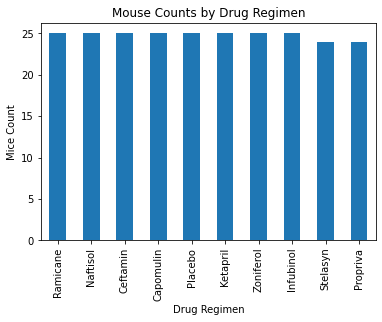

In [10]:
# plot the mouse counts for each drug using pandas
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mouse Counts by Drug Regimen")
plt.show()


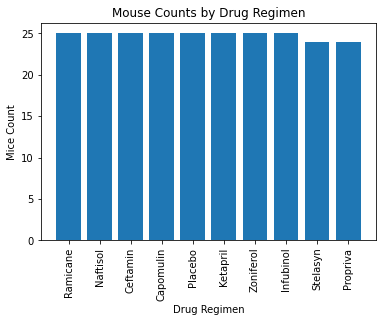

In [11]:
plt.bar(counts.index.values, counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Mouse Counts by Drug Regimen")
plt.show()

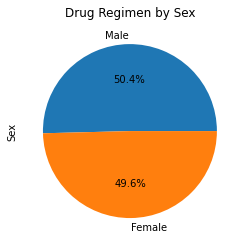

In [12]:
sexCount = individualMice["Sex"].value_counts()
sexCount.plot(kind="pie", autopct="%1.1f%%")
plt.title("Drug Regimen by Sex")
plt.show()

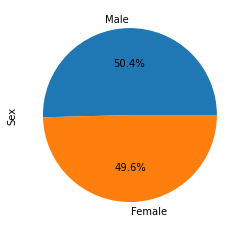

In [13]:
plt.pie(sexCount.values, labels=sexCount.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# drop'Ketapril', 'Naftisol',  'Stelasyn', 'Zoniferol', 'Propriva', 'Placebo'
#keep 'Capomulin', 'Infubinol','Ramicane',  'Ceftamin'

selectDrug = cleanStudy.set_index("Drug Regimen")
selectDrug = selectDrug.drop(index='Ketapril')
selectDrug = selectDrug.drop(index='Naftisol')
selectDrug = selectDrug.drop(index='Stelasyn')
selectDrug = selectDrug.drop(index='Zoniferol')
selectDrug = selectDrug.drop(index='Propriva')
selectDrug = selectDrug.drop(index='Placebo')
#selectDrug.head()

lastVolume = selectDrug.groupby("Mouse ID")["Timepoint"].max()
lastVolume.reset_index()
lastVolumeDF = pd.DataFrame(lastVolume)
lastVolumeDF.reset_index()

#only capomulin
#capomulin = cleanStudy.loc[cleanStudy["Drug Regimen"] == "Capomulin"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [22]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleanMergedDF = lastVolumeDF.merge(cleanStudy, on=["Mouse ID", "Timepoint"], how="inner")
# show all rows of data
cleanMergedDF.set_index("Mouse ID")


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,31.896238,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugList: 
    
    finalVolume = cleanMergedDF.loc[cleanMergedDF["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    volData.append(finalVolume)
    
    
    quartiles= finalVolume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = finalVolume.loc[(finalVolume < lowerbound) | (finalVolume > upperbound)]
    print(f"{drug}'s potential outliers: \n\t{outliers}")

Capomulin's potential outliers: 
	Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: 
	Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 
	15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: 
	Series([], Name: Tumor Volume (mm3), dtype: float64)


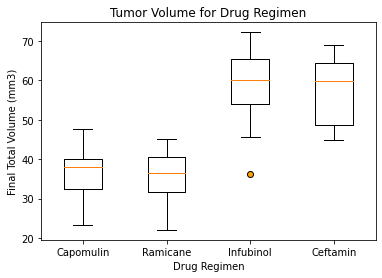

In [50]:
orange_out = dict(markerfacecolor="orange")
plt.boxplot(volData, labels=drugList, flierprops=orange_out)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Total Volume (mm3)")
plt.title("Tumor Volume for Drug Regimen")
plt.show()

## Line and Scatter Plots

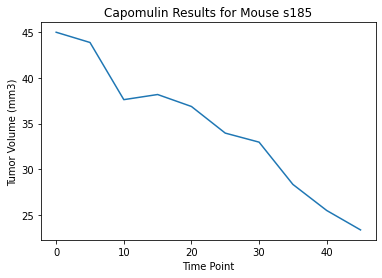

In [49]:
capomulin = cleanStudy.loc[cleanStudy["Drug Regimen"] == "Capomulin"]
Mouse_data = capomulin.loc[capomulin["Mouse ID"]=="s185"]
plt.plot(Mouse_data["Timepoint"], Mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Results for Mouse s185")
plt.show()

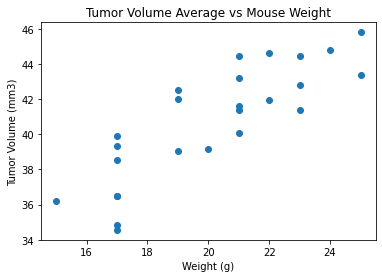

In [48]:
capomulinAverage = capomulin.groupby("Mouse ID").mean()
capomulinAverage.head()
plt.scatter(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Average vs Mouse Weight")
plt.show()

## Correlation and Regression

0.84


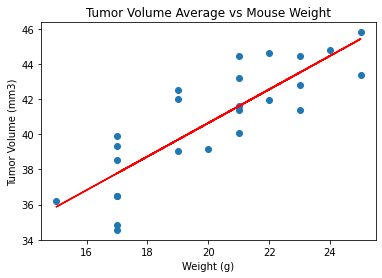

In [53]:
correlation = round(st.pearsonr(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])[0],2)
print(correlation)


model = st.linregress(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])
#print(model)

yValues = capomulinAverage["Weight (g)"] * model[0] + model[1] #y=mx+b

plt.scatter(capomulinAverage["Weight (g)"], capomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Average vs Mouse Weight")

plt.plot(capomulinAverage["Weight (g)"], yValues, color="red")

plt.show()